# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

__Доброго дня! Наверняка будут ошибки, которые уже не замечаю замыленным глазом.
Но вроде всё получилось, но не без труда :)__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

from pymystem3 import Mystem
from collections import Counter

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
data.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

### Вывод

Из основных проблем можем указать:
- плавающий регистр названия столбцов
- пропущенные значения в столбцах
- можно улучшить названия столбцов(для полного понимания)
- некорректные типы данных

### Шаг 2. Предобработка данных

In [8]:
data.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [9]:
#Переименуем столбцы
cols = ['total_images',
         'last_price',
         'total_area',
         'first_day_exposition',
         'number_of_rooms',
         'ceiling_height',
         'floors_total',
         'living_area',
         'floor',
         'is_apartment',
         'is_studio',
         'is_open_plan',
         'kitchen_area',
         'number_of_balconies',
         'town_name',
         'airports_nearest',
         'city_centers_nearest',
         'parks_around3000',
         'parks_nearest',
         'ponds_around3000',
         'ponds_nearest',
         'days_exposition']
data.set_axis(cols, axis="columns", inplace=True)

In [10]:
#Проверим изменения в названиях столбцов
data.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'number_of_rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'kitchen_area',
 'number_of_balconies',
 'town_name',
 'airports_nearest',
 'city_centers_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [11]:
#Детально изучим каждый столбец
len(data['town_name'].unique())

365

In [12]:
#Приведём к нижнему регистру, вероятно уменьшим количество дублей.
#Так же сразу заменим "ё" на "е"
data['town_name'] = data['town_name'].str.lower()
data['town_name'] = data['town_name'].str.replace('ё', 'е', regex=True)

In [13]:
#Получилось.
len(data['town_name'].unique())

331

In [14]:
#Проверим количетсво пропущенных значений.
data['town_name'].isna().sum()

49

In [15]:
#Удалим строки, где не указано название города. Вряд ли пользователю будет интересно
#объявление без указанного города
data = data.dropna(subset=['town_name']).reset_index()

In [16]:
#Проверим результат
data.head(20)

,index,total_images,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,number_of_balconies,town_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,...,25.00,NaN,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,...,11.00,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,...,8.30,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,...,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,...,41.00,NaN,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,...,9.10,NaN,городской поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,...,14.40,1.0,поселок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,...,18.90,2.0,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,...,8.81,NaN,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,...,6.50,2.0,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [17]:
data['town_name'].isna().sum()

0

In [18]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [19]:
#Значения "nan" заменим на False.
#Значения изменил по той причине, т.к. это являются объектами жилового фонда.
#За что точно оно отвечает неизвестно, поэтому решил привести значения к нулю(False).
data['is_apartment'] = data['is_apartment'].fillna(False)

In [20]:
data['is_apartment'].unique()

array([False,  True])

In [21]:
data['is_apartment'].value_counts()

False    23600
True        50
Name: is_apartment, dtype: int64

In [22]:
#Так же проверим 
data['is_studio'].unique()

array([False,  True])

In [23]:
data['is_studio'].value_counts()

False    23501
True       149
Name: is_studio, dtype: int64

In [24]:
data['is_open_plan'].unique()

array([False,  True])

In [25]:
data['is_open_plan'].value_counts()

False    23583
True        67
Name: is_open_plan, dtype: int64

In [26]:
data.head(10)

,index,total_images,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,number_of_balconies,town_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,...,25.00,NaN,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,...,11.00,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,...,8.30,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,...,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,...,41.00,NaN,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,...,9.10,NaN,городской поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,...,14.40,1.0,поселок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,...,18.90,2.0,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,...,8.81,NaN,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,...,6.50,2.0,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [27]:
data['number_of_balconies'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [28]:
data['number_of_balconies'].value_counts()

1.0    4187
0.0    3725
2.0    3658
5.0     304
4.0     182
3.0      81
Name: number_of_balconies, dtype: int64

In [29]:
#Количество пропущенных значения 11513 - очень много.
data['number_of_balconies'].isna().sum()

11513

In [30]:
#На мой взгляд значения пропущены по той причине, что балкона нет, поэтому решили ничего не вносить.
#Изменим значения на нули.
data['number_of_balconies'] = data['number_of_balconies'].fillna(0)

In [31]:
data['number_of_balconies'].isna().sum()

0

In [32]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

In [33]:
data.head(5)

,index,total_images,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,number_of_balconies,town_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,...,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,...,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,...,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,...,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,...,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


__Вывод по разделу предобработки:
Прошлись по основным столбцам, которые понадобятся в дальнейшем для работы. 
Пропущенные значения в столбцах ceiling_height, kitchen_area, parks_nearest, number_of_balconies, parks_nearest, ponds_nearest не изменял по той причине, что тогда они исказят данные. При заполнении люди попросту могут не знать, либо очень далеко расстояние до ближайшего парка/водоёма. Касаемо высоты потолка невозможно сформировать средние, либо медианные значения, это будет существенно искажать действительность.
Наверняка значения пропущены по той причине, что люди не владеют полными данными о квартире при продаже. На мой взгляд, можно это исправить, если установить поля обязательными к заполнению(как минимум для основных параметров - город, цена, площадь, количество комнат, высота, жилая площадь, кухня и этаж)__

В таблице встречаются и аномальные значения:
- Высота потолка 100 м и 1,3м.
- Общая площадь 900 кв.м.
- Количество этажей 60

### Шаг 3. Посчитайте и добавьте в таблицу

In [34]:
# Добавим столбцы c днем, месяцем и годом
data['weekday_exposition'] = data['first_day_exposition'].dt.day_name()
data['month_exposition'] = data['first_day_exposition'].dt.month_name()
data['year_exposition'] = data['first_day_exposition'].dt.year

In [35]:
#Проверим как получилось.
data.head(5)

,index,total_images,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,...,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_exposition,month_exposition,year_exposition
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Thursday,March,2019
1,1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Tuesday,December,2018
2,2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Thursday,August,2015
3,3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Friday,July,2015
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Tuesday,June,2018


In [36]:
#Добавим функция согласно условиям задачи по этажам:
def floor_status(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [37]:
data['floor_status'] = data.apply(floor_status, axis=1)

In [38]:
data.head(5)

,index,total_images,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_exposition,month_exposition,year_exposition,floor_status
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,...,16028.0,1.0,482.0,2.0,755.0,NaN,Thursday,March,2019,другой
1,1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,...,18603.0,0.0,NaN,0.0,NaN,81.0,Tuesday,December,2018,первый
2,2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,...,13933.0,1.0,90.0,2.0,574.0,558.0,Thursday,August,2015,другой
3,3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,...,6800.0,2.0,84.0,3.0,234.0,424.0,Friday,July,2015,другой
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,...,8098.0,2.0,112.0,1.0,48.0,121.0,Tuesday,June,2018,другой


In [39]:
#Рассчитаем цену за 1 кв.м.
data['price_per_meter'] = data['last_price'] / data['total_area']
data['price_per_meter'] = data['price_per_meter'].round(decimals=2)

In [40]:
data.head(5)

,index,total_images,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_exposition,month_exposition,year_exposition,floor_status,price_per_meter
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,...,1.0,482.0,2.0,755.0,NaN,Thursday,March,2019,другой,120370.37
1,1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,...,0.0,NaN,0.0,NaN,81.0,Tuesday,December,2018,первый,82920.79
2,2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,...,1.0,90.0,2.0,574.0,558.0,Thursday,August,2015,другой,92785.71
3,3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,...,2.0,84.0,3.0,234.0,424.0,Friday,July,2015,другой,408176.10
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,...,2.0,112.0,1.0,48.0,121.0,Tuesday,June,2018,другой,100000.00


In [41]:
#Добавим значения с соотношениям жилой площади к общей и
#площади кухни к общей площади
data['living_area_ratio'] = data['living_area'] / data['total_area']
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

In [42]:
data.head(5)

,index,total_images,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around3000,ponds_nearest,days_exposition,weekday_exposition,month_exposition,year_exposition,floor_status,price_per_meter,living_area_ratio,kitchen_area_ratio
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,...,2.0,755.0,NaN,Thursday,March,2019,другой,120370.37,0.472222,0.231481
1,1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,...,0.0,NaN,81.0,Tuesday,December,2018,первый,82920.79,0.460396,0.272277
2,2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,...,2.0,574.0,558.0,Thursday,August,2015,другой,92785.71,0.612500,0.148214
3,3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,...,3.0,234.0,424.0,Friday,July,2015,другой,408176.10,NaN,NaN
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,...,1.0,48.0,121.0,Tuesday,June,2018,другой,100000.00,0.320000,0.410000


In [43]:
data['living_area_ratio'].isnull().sum()

1898

In [44]:
data['kitchen_area_ratio'].isnull().sum()

2269

__Вывод:
    Добавили столбец с этажами и сгруппировали их(первый, последний, другой) это поможет в дальнейшем правильно оценить стоимость квартиры. На первом и последнем этажах, как правило, квартиры дешевле, это позволит определить степень влияния при формировании цены.
    Как правило, при покупке квартиры одним запросов является соотношение жилой площади к общей, а так же площади кухни по отношению к общей. Т.к. эти коэффициенты так же могут повлиять на стоимость квартиры.__

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

__Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.__

In [45]:
data[['total_area', 'last_price', 'number_of_rooms', 'ceiling_height']].describe()

,total_area,last_price,number_of_rooms,ceiling_height
count,23650.000000,2.365000e+04,23650.000000,14490.000000
mean,60.329069,6.541127e+06,2.070106,2.771287
std,35.661808,1.089640e+07,1.078620,1.261593
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.520000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.700000,6.799000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,100.000000


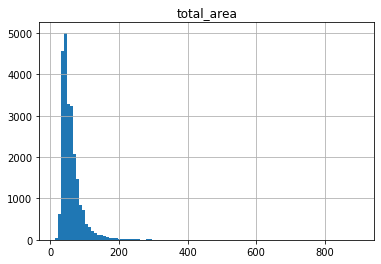

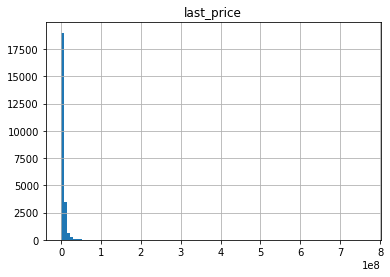

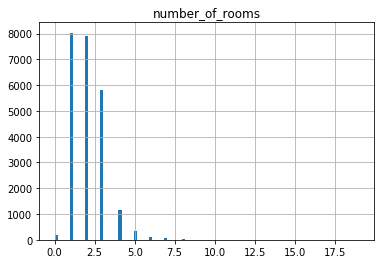

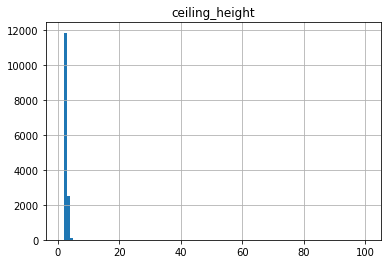

In [46]:
a=['total_area', 'last_price', 'number_of_rooms', 'ceiling_height']
for i in a:
    data.hist(column=i, bins=100)

Исходя из диаграмм можно сделать вывод:
- Общая площадь - мощный узкий пик на значении 40 кв.м. достигающий количества 5000.
- Цена - Пик околонулевого значения достигающий количества почти до 12000. 
- Количество комнат - диаграмма не очень гладкая, на ней наблюдаются всплески или так называемые шумы.
- Высота потолков - основной пик приходится на одно из начальных значений по причине того, что данные там практически однотипные.(Есть просто стандарт, которого придерживаются) Оставшиеся значения разнятся незначительно.


<div class="alert alert-warning">
    <p><b>Комментарий от ревьюера v2: </b>Почему же у комнат шумы? Просто большая дискретность значений: 1, 2, 3, ...</p>
    <p>Я бы даже сказал, что распределение комнат похоже на нормальное.</p>
</div>

Исходя из заданных параметров можно выделить выбивающиеся значения:
- Минимальная высота потолка 1м, а максимальная 100м.
- Максимальная площадь 900 кв.м.

In [47]:
# Функция для удаления выбросов
# Данным действием хотелось бы убрать выбросы по основным параметрам и сравнить значения "с" и "без".

def del_emissions(data, column,graphic=0,x=10,y=10):
    first_quant = data[column].quantile(0.25)                 
    third_quant = data[column].quantile(0.75)
    btw = third_quant - first_quant
    check = (data[column] >= (first_quant - 1.5*btw)) & (data[column] <= (third_quant + 1.5*btw))
    if graphic == 1:
        return data.loc[check].boxplot([column], figsize=(x,y))
    else:
        return data.loc[check]

(0, 150)

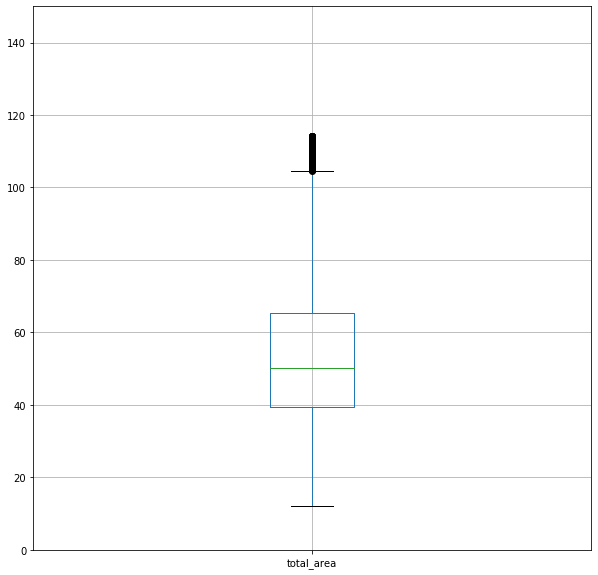

In [48]:
del_emissions(data,'total_area',1,10,10).set_ylim(0,150)

__Общая площадь квартир распределена нормально, среднее значение и медиана отличаются незначительно. Однако на данной гистограмме заметны хаотичные всплески значений в диапазоне 105-115.__

In [49]:
del_emissions(data,'total_area',0)['total_area'].mean()

54.32568508435241

(0, 10000000)

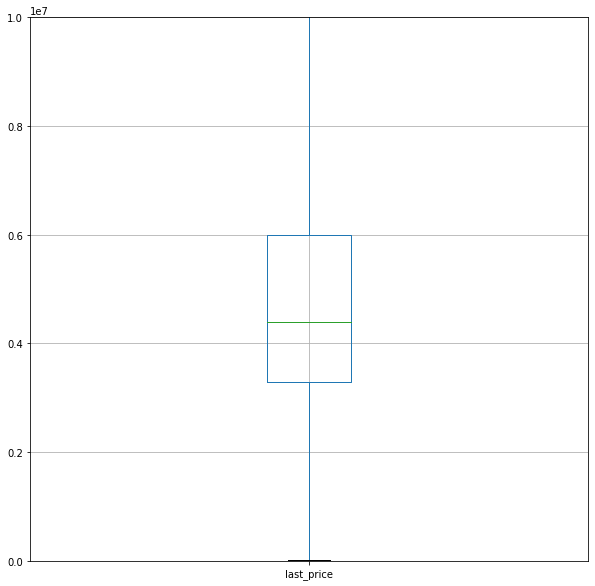

In [50]:
del_emissions(data,'last_price',1,10,10).set_ylim(0, 10000000)

__В целом гистограмма показывает, что цена распределна нормально. Распределние в размахе от нуля до 10 млн., медиана находится примерно на уровне 4.300.000 и отличается от среднего значения в размере 4.838.942 незначительно.__

In [51]:
del_emissions(data,'last_price',0)['last_price'].mean()

4838942.090946979

(0, 400)

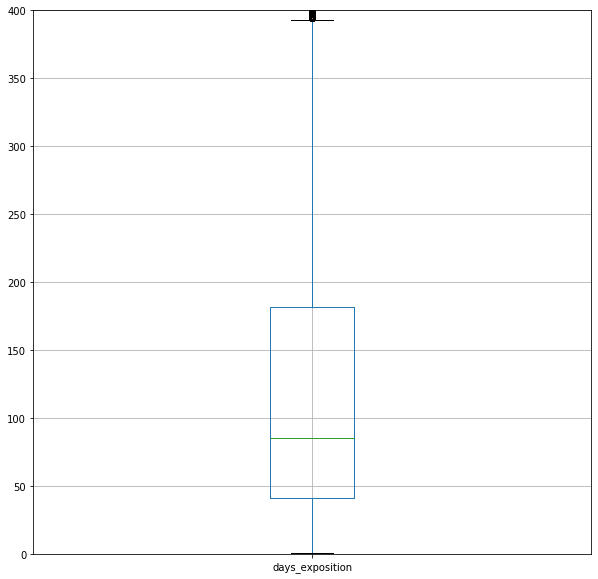

In [52]:
del_emissions(data,'days_exposition',1,10,10).set_ylim(0, 400)

__Можно обратить внимание, что среднее почти в 2 раза больше медианы. Это говорит о том, что в распределении много высоких значений влияющих на среднее, но не на медиану.__

In [53]:
del_emissions(data,'days_exposition',0)['days_exposition'].mean()

128.39811662055757

In [54]:
del_emissions(data,'days_exposition',0)['days_exposition'].median()

85.0

In [55]:
data[['total_area', 'last_price', 'days_exposition']].describe()

,total_area,last_price,days_exposition
count,23650.000000,2.365000e+04,20470.000000
mean,60.329069,6.541127e+06,180.753200
std,35.661808,1.089640e+07,219.777916
min,12.000000,1.219000e+04,1.000000
25%,40.000000,3.400000e+06,45.000000
50%,52.000000,4.650000e+06,95.000000
75%,69.700000,6.799000e+06,231.000000
max,900.000000,7.630000e+08,1580.000000


Итого по данным параметрам:
1. Средняя общая площадь с выбросами составляет 60 кв.м.
   Без выбросов 54 кв.м.
2. Среднее значение по количеству дней продажи с выбросами составляет 180.
   С учётом выбросов среднее значение 128, а медианное 85.
   На мой взгляд продажи происходили необычно быстро, если значение составляет менее 85 дней. Если же количество больше 180 дней, то это чрезвычайно долго. Значит для продажи необходимо что-то дополнительно предпринимать.
   

   __Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.__

In [56]:
corr = data[['price_per_meter',
           'total_area',
           'days_exposition',
           'city_centers_nearest',
           'number_of_rooms']].corr()
corr.style.background_gradient(cmap='coolwarm')

,price_per_meter,total_area,days_exposition,city_centers_nearest,number_of_rooms
price_per_meter,1,0.302202,0.0477104,-0.318099,0.0554705
total_area,0.302202,1,0.149571,-0.231904,0.758745
days_exposition,0.0477104,0.149571,1,-0.0594809,0.126497
city_centers_nearest,-0.318099,-0.231904,-0.0594809,1,-0.184322
number_of_rooms,0.0554705,0.758745,0.126497,-0.184322,1


__Вывод:
    Цена в  наибольшей степени зависит от двух параметров: Прямая корреляция - Общая площадь. И обратная - расположенность по отношению к центру города(Чем дальше от центра, тем меньше цена). А количество комнат и срок давности объявления имеют незначительный вес при формировании цены.__

(0, 200000)

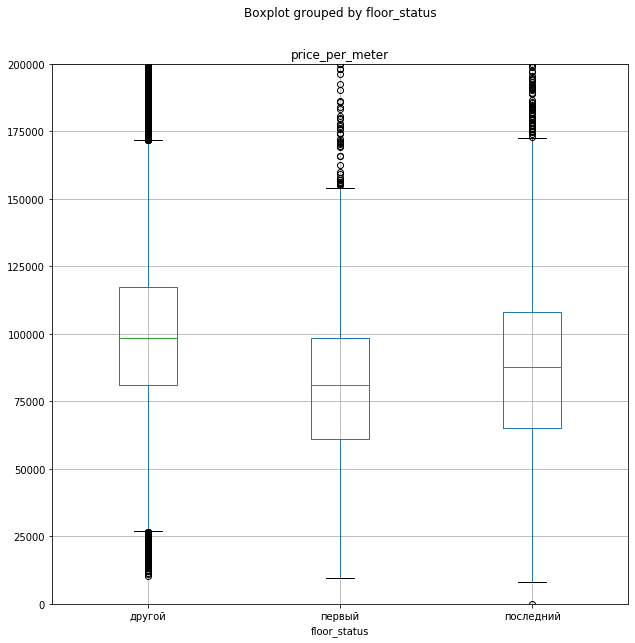

In [57]:
data.boxplot('price_per_meter', by='floor_status',figsize=(10,10)).set_ylim(0,200000)

(0, 200000)

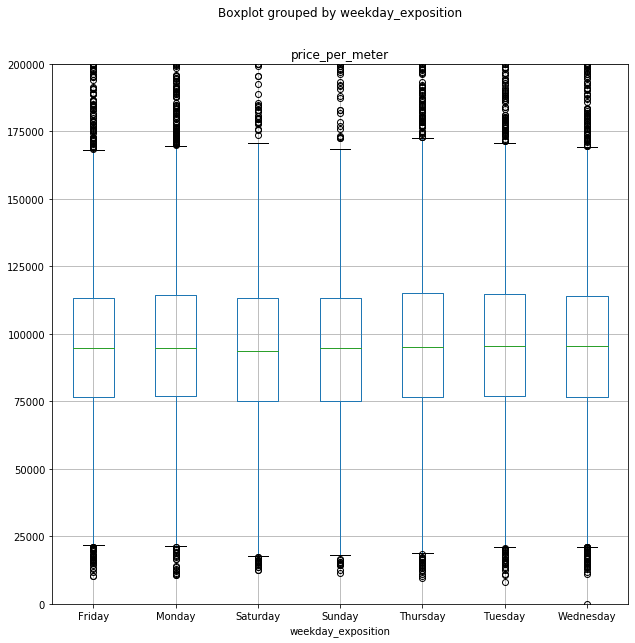

In [58]:
data.boxplot('price_per_meter', by='weekday_exposition',figsize=(10,10)).set_ylim(0,200000)

(0, 200000)

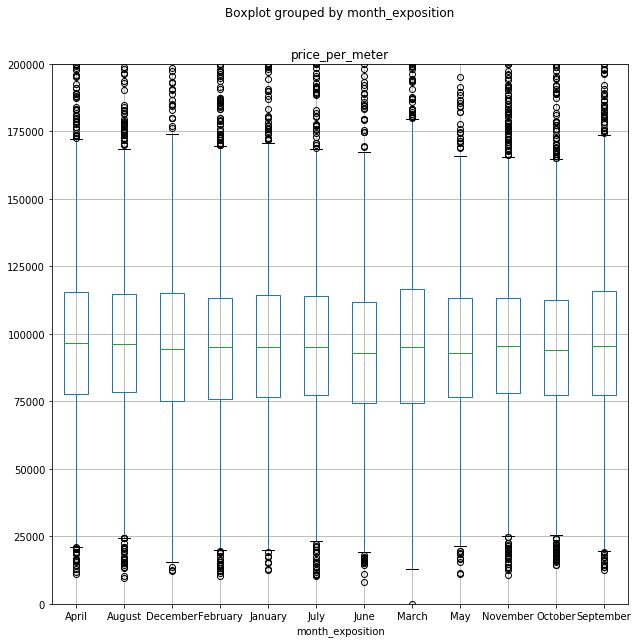

In [59]:
data.boxplot('price_per_meter', by='month_exposition',figsize=(10,10)).set_ylim(0,200000)

(0, 200000)

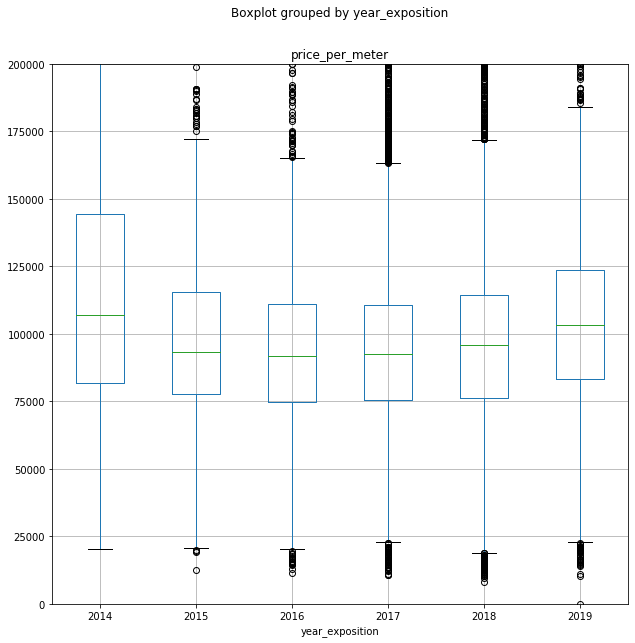

In [60]:
data.boxplot('price_per_meter', by='year_exposition',figsize=(10,10)).set_ylim(0,200000)

__Нельзя однозначно сказать, что день недели/месяц/год имеют влияние на формирование цен. Однако, цены квартир на первом этаже значительно ниже, чем на последнем.__

In [61]:
#Выберем 10 населённых пунктов с наибольшим количеством объявлений(за исключением Санкт-Петербурга)
town_top10=data['town_name'].value_counts().head(11)
town_top10

санкт-петербург      15721
поселок мурино         556
поселок шушары         440
всеволожск             398
пушкин                 369
колпино                338
поселок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
петергоф               201
Name: town_name, dtype: int64

In [62]:
data_top10 = data.groupby('town_name')\
    .agg({'last_price':'count','price_per_meter':'mean'})
data_top10 = data_top10.sort_values('last_price', ascending=False).head(11)
data_top10

,last_price,price_per_meter
town_name,,
санкт-петербург,15721,114849.008793
поселок мурино,556,85681.762572
поселок шушары,440,78677.364318
всеволожск,398,68654.473970
пушкин,369,103125.819377
колпино,338,75424.579112
поселок парголово,327,90175.913089
гатчина,307,68746.146515
деревня кудрово,299,92473.547559


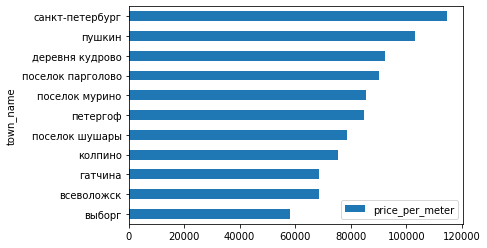

In [63]:
data_top10.sort_values('price_per_meter', ascending=True)\
    .drop('last_price', axis=1).plot(kind='barh')

In [64]:
data_top10_list = data_top10.reset_index().town_name.to_list()
data_top10_list

['санкт-петербург',
 'поселок мурино',
 'поселок шушары',
 'всеволожск',
 'пушкин',
 'колпино',
 'поселок парголово',
 'гатчина',
 'деревня кудрово',
 'выборг',
 'петергоф']

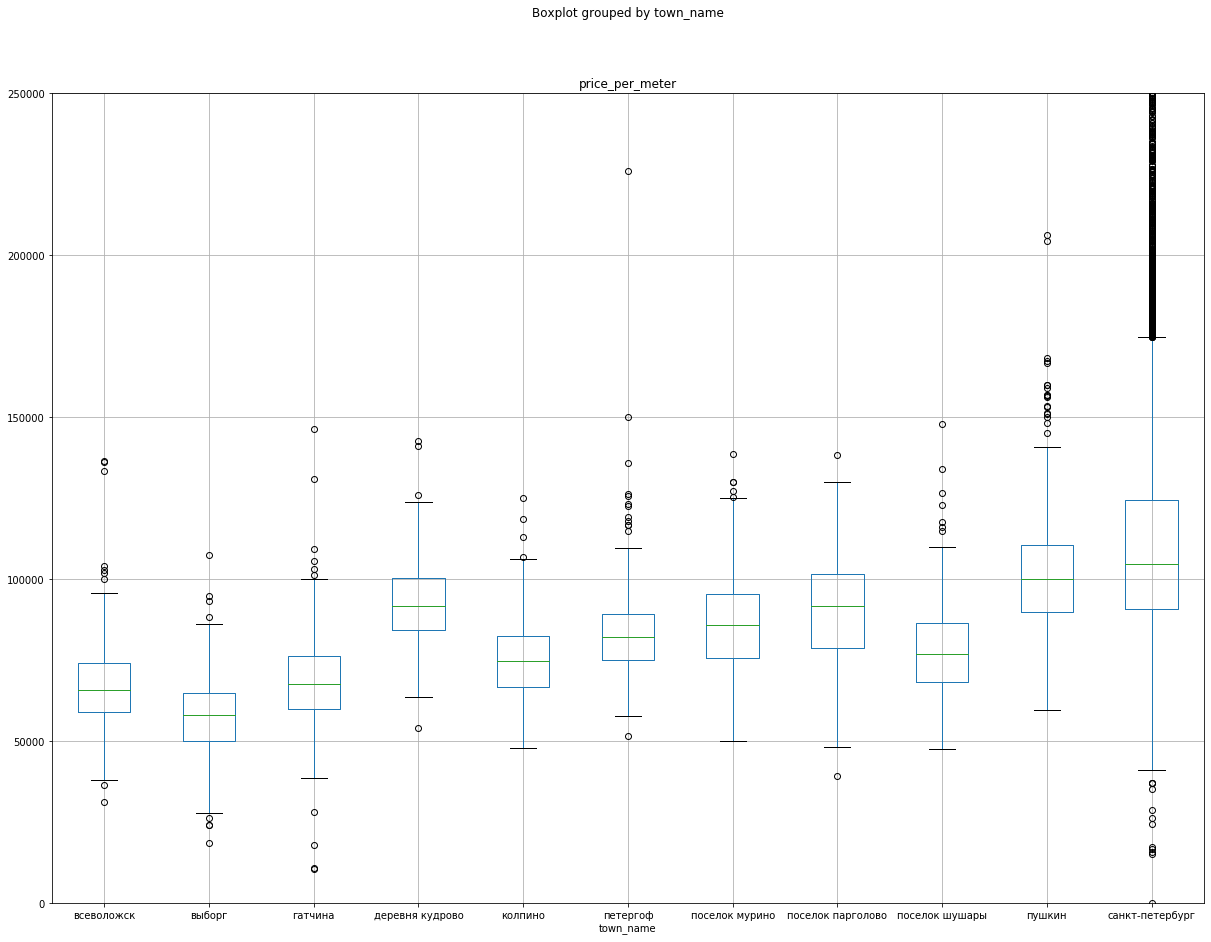

In [65]:
plot = data[data.town_name.isin(data_top10_list)]\
    .boxplot('price_per_meter', by='town_name',figsize=(20,15))\
    .set_ylim(0,250000)

__Исходя из полученных данных + графика можно понять, что самые дешёвые объекты недвижимости в Выборге. Самые дорогие - Санкт-Петербург__

### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

In [66]:
#Создаём столбец с расстоянием до центра в км и округляем его до целых чисел.
#Самопроверяемся.
city_center_data = data.dropna(subset=['city_centers_nearest'])
center = city_center_data.query('town_name == "санкт-петербург"')
center['center_km'] = (center['city_centers_nearest']/1000).astype('int')
center['price_per_km'] = center.groupby('center_km').agg({'last_price': 'mean'})
center

,index,total_images,last_price,total_area,first_day_exposition,number_of_rooms,ceiling_height,floors_total,living_area,floor,...,days_exposition,weekday_exposition,month_exposition,year_exposition,floor_status,price_per_meter,living_area_ratio,kitchen_area_ratio,center_km,price_per_km
0,0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,...,NaN,Thursday,March,2019,другой,120370.37,0.472222,0.231481,16,2.344232e+07
2,2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,...,558.0,Thursday,August,2015,другой,92785.71,0.612500,0.148214,13,1.616331e+07
3,3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,...,424.0,Friday,July,2015,другой,408176.10,NaN,NaN,6,1.343683e+07
4,4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,...,121.0,Tuesday,June,2018,другой,100000.00,0.320000,0.410000,8,1.363202e+07
7,7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,...,NaN,Thursday,April,2019,другой,110544.69,NaN,0.263966,11,1.279767e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23640,23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.3,4,...,29.0,Wednesday,February,2018,другой,100566.57,0.461756,0.257790,16,NaN
23641,23690,3,5500000.0,52.00,2018-07-19,2,NaN,5.0,31.0,2,...,15.0,Thursday,July,2018,другой,105769.23,0.596154,0.115385,6,NaN
23642,23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,...,519.0,Thursday,October,2016,другой,129903.98,0.552812,0.145405,4,NaN
23645,23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,...,NaN,Tuesday,March,2017,другой,72490.85,0.547792,0.103356,4,NaN


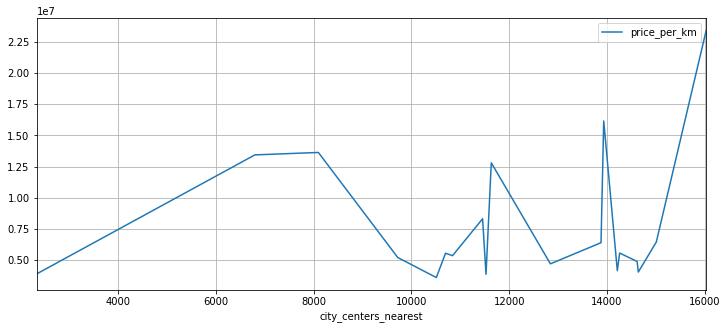

In [67]:
center.pivot_table(index="city_centers_nearest", values="price_per_km").plot(grid=True, figsize=(12, 5))

__Исходя из графика можно предположить, что за крайний киллометраж по "центру" принимается в ориентировочное расстояние в 8000 метров.__

In [1]:
data_in_center=center.query('center_km <= 8')
cor_in_center = data_in_center.corr().sort_values('last_price', ascending=False).filter(items = ['last_price'])\
        .reset_index()
cor_in_center.style.background_gradient('coolwarm')

NameError: name 'center' is not defined

In [2]:
data_out_center=center.query('center_km > 8')
cor_out_center = data_out_center.corr().sort_values('last_price', ascending=False).filter(items = ['last_price'])\
        .reset_index()
cor_out_center.style.background_gradient('coolwarm')

NameError: name 'center' is not defined

In [70]:
#Объединим обе таблицы для наглядности
cor_in_out_center = cor_in_center.merge(cor_out_center, on='index')
cor_in_out_center = cor_in_out_center.rename(columns={'last_price_x':'cor_in_center', 'last_price_y':'cor_out_center'})
cor_in_out_center.style.background_gradient('coolwarm')

,index,cor_in_center,cor_out_center
0,last_price,1,1
1,price_per_meter,0.776956,0.510826
2,total_area,0.641044,0.829061
3,living_area,0.545322,0.700782
4,price_per_km,0.530829,0.440151
5,kitchen_area,0.506961,0.646798
6,number_of_rooms,0.34509,0.519028
7,total_images,0.131064,0.18447
8,ponds_around3000,0.116041,0.102383
9,parks_around3000,0.111203,0.0844722


По недвижимости в центре наибольшее значение имеют:
- Цена за квадрат
- Все виды площадей
- Количество комнат

По недвижимости за пределом центра:
- Площади
- Количество комнат
- Цена за квадрат
- Балконы
- Этаж

### Шаг 5. Общий вывод

- В данных есть значительное количество пропущенных значений. Большую часть из них мы не заполняли по той причине, что это может сильно исказить данных. (Например высота потолков или площадь).
- Встретили также и аномальные значения:- Минимальная высота потолка 1м, а максимальная 100м. Максимальная площадь 900 кв.м.
- Датасет с выбросами и датасет без выбросов дает примерно один и тот же результат, применительно к текущим задачам один: вряд ли важно цена за квадрат 90 или 95 тысяч, это ни на что не влияет.
- Квартире в пределах Питера дороже, ежели квартиры вне. Самая дешёвая недвижимость в Выборг.
- Цена в  наибольшей степени зависит от двух параметров: Прямая корреляция - Общая площадь. И обратная - расположенность по отношению к центру города(Чем дальше от центра, тем меньше цена). А количество комнат и срок давности объявления имеют незначительный вес при формировании цены.
- Попробовали рассчитать как сильно при покупке квартиры может влиять этаж. Исходя из гистограммы можно понять, что квартиры расположенные на первом и последнем этажах стоят значительно ниже тех, что находятся между ними.
- Так же по недвижимости в центре(ближе 8000 метров) наибольшее влияние на формирование цены имеют 1) Цена за квадратный метр. 2) Все виды площадей. 3) Рассчитанная нами средняя цена за 1 км до центра(насколько сильно влияет).
- По недвижимости за пределом центра наибольшее влияние на формирование цены имеют: 1) Все виды площадей. 2) Количество комнат. 3)Цена за квадратный метр.

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод